<a href="https://colab.research.google.com/github/Sylou2022/NLP---Translation/blob/main/seq2seq_traduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 11.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.7 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.31.0
    Uninstalling requests-2.31.0:
      Successfully uninstalled requests-2.31.0
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 14.0.2
    Uninstalling pyarrow-14.0.2:
      Successfully uninstalled pyarrow-14.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24

In [2]:
from datasets import load_dataset
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy

# Data preparation

In [3]:
dataset = load_dataset("tatoeba", lang1="en", lang2="fr")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


The repository for tatoeba contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/tatoeba.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split: 0 examples [00:00, ? examples/s]

In [4]:
english_sentences = []
french_sentences = []
for exemple in dataset["train"]["translation"]:
  english_sentences.append(exemple["en"])
  french_sentences.append(f'<sos> {exemple["fr"]} <eos>')

In [5]:
french_sentences[0]

"<sos> Lorsqu'il a demandé qui avait cassé la fenêtre, tous les garçons ont pris un air innocent. <eos>"

In [6]:
english_tokenizer = Tokenizer(5000)
english_tokenizer.fit_on_texts(english_sentences)
english_sentences_tokenized = english_tokenizer.texts_to_sequences(english_sentences)

In [7]:
english_sentences[100]

'Hurry up.'

In [8]:
english_sentences_tokenized[100]

[554, 60]

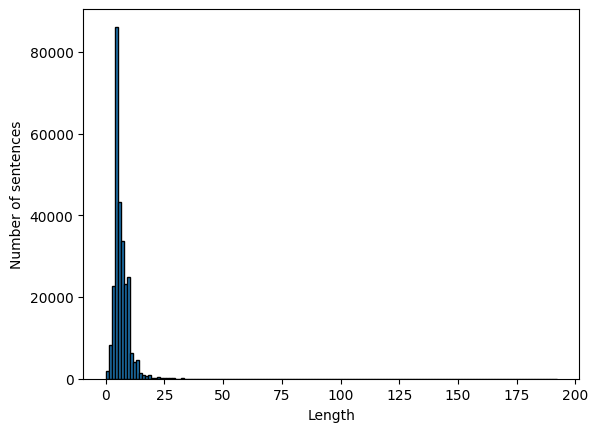

In [9]:
lengths = [len(english_list_of_tokens) for english_list_of_tokens in english_sentences_tokenized]

plt.hist(lengths, bins=150, edgecolor="black")
plt.xlabel("Length")
plt.ylabel("Number of sentences")
plt.show()

In [10]:
english_sentences_tokenized = pad_sequences(english_sentences_tokenized, padding="post", maxlen=30)

In [11]:
french_tokenizer = Tokenizer(5000)
french_tokenizer.fit_on_texts(french_sentences)
french_sentences_tokenized = french_tokenizer.texts_to_sequences(french_sentences)

In [12]:
encoder_input_data = english_sentences_tokenized
decoder_input_data = [tokenized_sentence[:-1] for tokenized_sentence in french_sentences_tokenized]




target_data = [tokenized_sentence[1: ] for tokenized_sentence in french_sentences_tokenized]

In [13]:
print(decoder_input_data[0])
print(target_data[0])

[1, 1177, 17, 275, 35, 123, 969, 6, 532, 85, 18, 915, 88, 224, 15, 2208, 2166]
[1177, 17, 275, 35, 123, 969, 6, 532, 85, 18, 915, 88, 224, 15, 2208, 2166, 2]


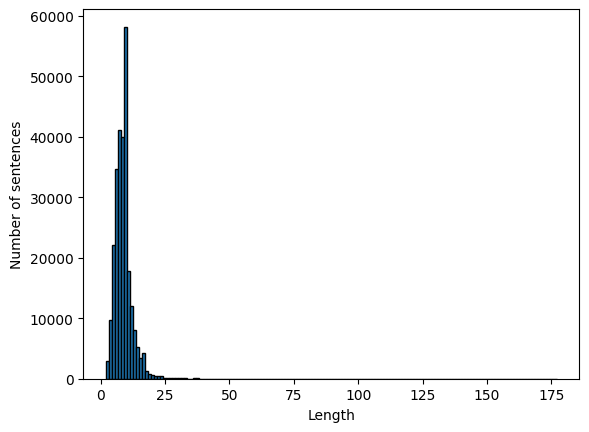

In [14]:
lengths = [len(french_list_of_tokens) for french_list_of_tokens in french_sentences_tokenized]

plt.hist(lengths, bins=150, edgecolor="black")
plt.xlabel("Length")
plt.ylabel("Number of sentences")
plt.show()

In [15]:
decoder_input_data = pad_sequences(decoder_input_data, padding="post", maxlen=30)

In [16]:
target_data = pad_sequences(target_data, padding="post", maxlen=30)

In [17]:
decoder_input_data[0]

array([   1, 1177,   17,  275,   35,  123,  969,    6,  532,   85,   18,
        915,   88,  224,   15, 2208, 2166,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [18]:
target_data[0]

array([1177,   17,  275,   35,  123,  969,    6,  532,   85,   18,  915,
         88,  224,   15, 2208, 2166,    2,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0], dtype=int32)

In [19]:
target_data = target_data[..., None]

## split

In [20]:
dataset_length = len(encoder_input_data)
train_length = int(dataset_length * 0.8)
test_length = dataset_length - train_length

train_encoder_input_data = encoder_input_data[:train_length]
train_decoder_input_data = decoder_input_data[:train_length]
train_target_data = target_data[:train_length]

test_encoder_input_data = encoder_input_data[train_length:]
test_decoder_input_data = decoder_input_data[train_length:]
test_target_data = target_data[train_length:]

# Model

In [21]:
from tensorflow import keras

def generate_seq2seq_lstm_model(latent_dim=128, num_encoder_tokens=5000, num_decoder_tokens=5000, embedding_dim=128):
    # Encoder
    encoder_input = keras.layers.Input(shape=(None,), name="encoder_input")

    encoder_embedding = keras.layers.Embedding(num_encoder_tokens, embedding_dim, name="encoder_embedding")(encoder_input)

    encoder_lstm = keras.layers.LSTM(latent_dim, return_state=True, name="encoder_lstm")
    _, state_h, state_c = encoder_lstm(encoder_embedding)
    context_vector = [state_h, state_c]

    # decoder

    decoder_input = keras.layers.Input(shape=(None,), name="decoder_input")


    decoder_embedding = keras.layers.Embedding(num_decoder_tokens, embedding_dim, name="decoder_embedding")(decoder_input)
    decoder_lstm = keras.layers.LSTM(latent_dim, return_state=True, return_sequences=True, name="decoder_lstm")

    decoder_outputs, _, _ = decoder_lstm(decoder_embedding, initial_state=context_vector)


    decoder_dense = keras.layers.Dense(num_decoder_tokens, activation="softmax", name="output_layer")
    model_outputs = decoder_dense(decoder_outputs)

    model = keras.models.Model([encoder_input, decoder_input], [model_outputs])


    model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

    return model

In [22]:
model = generate_seq2seq_lstm_model()
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 encoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 decoder_input (InputLayer)  [(None, None)]               0         []                            
                                                                                                  
 encoder_embedding (Embeddi  (None, None, 128)            640000    ['encoder_input[0][0]']       
 ng)                                                                                              
                                                                                                  
 decoder_embedding (Embeddi  (None, None, 128)            640000    ['decoder_input[0][0]']   

In [23]:
early_stopping = keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, restore_best_weights=True)

In [24]:
model.fit([train_encoder_input_data, train_decoder_input_data], train_target_data, epochs=200, batch_size=128, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/200
1325/1325 [==============================] - 63s 40ms/step - loss: 1.5065 - accuracy: 0.7838 - val_loss: 1.1401 - val_accuracy: 0.8145
Epoch 2/200
1325/1325 [==============================] - 36s 27ms/step - loss: 1.1532 - accuracy: 0.8074 - val_loss: 0.9704 - val_accuracy: 0.8305
Epoch 3/200
1325/1325 [==============================] - 36s 27ms/step - loss: 0.9853 - accuracy: 0.8269 - val_loss: 0.8360 - val_accuracy: 0.8466
Epoch 4/200
1325/1325 [==============================] - 35s 27ms/step - loss: 0.8694 - accuracy: 0.8403 - val_loss: 0.7432 - val_accuracy: 0.8583
Epoch 5/200
1325/1325 [==============================] - 35s 27ms/step - loss: 0.7775 - accuracy: 0.8516 - val_loss: 0.6702 - val_accuracy: 0.8683
Epoch 6/200
1325/1325 [==============================] - 35s 27ms/step - loss: 0.7029 - accuracy: 0.8615 - val_loss: 0.6152 - val_accuracy: 0.8759
Epoch 7/200
1325/1325 [==============================] - 35s 26ms/step - loss: 0.6425 - accuracy: 0.8700 - val_loss: 0

In [25]:
model.save("Google translate diy")

Exception ignored in: <function _xla_gc_callback at 0x7c340f3c4790>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 98, in _xla_gc_callback
KeyboardInterrupt: 


# Utilisation du modèle
Fragementer mon modèle en 2 sous modèles:
1. Encodeur : traduit de l'anglais à un "language mathématiques"
2. Décodeur : traduit du "language mathématique" au français

In [26]:
def get_encoder_decoder_model(model,latent_dim):

  encoder_input = model.input[0]
  encoder_embedding = model.get_layer("encoder_embedding")(encoder_input)
  encoder_lstm = model.get_layer("encoder_lstm")
  _, state_h, state_c = encoder_lstm(encoder_embedding)
  context_vector = [state_h, state_c]
  encoder_model = keras.models.Model(encoder_input, context_vector)

  decoder_input = model.input[1]
  decoder_state_h_input = keras.layers.Input(shape=(latent_dim,), name="decoder_state_h_input")
  decoder_state_c_input = keras.layers.Input(shape=(latent_dim,), name="decoder_state_c_input")

  decoder_embedding = model.get_layer("decoder_embedding")(decoder_input)
  decoder_lstm_layer = model.get_layer("decoder_lstm")
  decoder_outputs, decoder_state_h, decoder_state_c = decoder_lstm_layer(decoder_embedding, initial_state=[decoder_state_h_input, decoder_state_c_input])

  decoder_output = model.get_layer("output_layer")(decoder_outputs[-1])


  decoder_model = keras.models.Model([decoder_input, decoder_state_h_input, decoder_state_c_input], [decoder_output, decoder_state_h, decoder_state_c])


  return encoder_model, decoder_model

In [27]:
encoder_model, decoder_model = get_encoder_decoder_model(model, 128)

In [28]:
def translate_sentence(sentence, encoder_model, decoder_model, english_tokenizer, french_tokenizer, padding=30):

  sequence = numpy.array([english_tokenizer.word_index.get(word, 0) for word in sentence.split()])
  print(sequence)
  sequence = pad_sequences([sequence], maxlen=padding, padding='post')

  decoder_lstm_input = numpy.array([[french_tokenizer.word_index["sos"]]])
  states_values = encoder_model.predict(sequence) # à la première itération il s'agit du vecteur de contexte


  stop_condition = False
  translated_sentence = []

  while not stop_condition:
    decoder_inputs = [decoder_lstm_input] + states_values

    output_token, h, c = decoder_model.predict(decoder_inputs)

    predicted_token_index = numpy.argmax(output_token[0])

    predicted_token = french_tokenizer.index_word[predicted_token_index]



    if predicted_token == "eos" or len(translated_sentence) > padding:
      stop_condition = True
      break
    translated_sentence.append(predicted_token)
    decoder_lstm_input = numpy.array([[predicted_token_index]])
    states_values = [h, c]


  return " ".join(translated_sentence)

# TESTER LE MODELE

In [40]:
translate_sentence("if you want give me dollars you must send me money", encoder_model, decoder_model, english_tokenizer, french_tokenizer, padding=30)

[ 57   3  34 126  16 807   3 119 679  16 116]
1/1 [==============================] - 0s 18ms/step


"si tu veux ma montre pour moi donner l'argent"